In [2]:
import gym
from policy_eval import PolicyEvaluator
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt

Поиск V для случайной политики


Случайная политика, детерминированное окружение

In [3]:
env = gym.make('frozen_lake:default-v0', map_name='small')
env.reset()
policy = np.zeros((env.observation_space.n, env.action_space.n)) + 1/env.action_space.n
evaluator = PolicyEvaluator(env=env)
v1 = evaluator.direct_evaluation(policy)
v2 = evaluator.iterative_evaluation(policy, th=0.001)
print('Прямое решение\n', np.round(v1, 3))
print('\n')
print('Итеративное решение\n', np.round(v2, 3))
print(f'Ошибка : {np.abs(v1-v2).sum()}' )

Прямое решение
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.006 0.
 0.    0.007 0.257 0.   ]


Итеративное решение
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.006 0.
 0.    0.007 0.257 0.   ]
Ошибка : 0.00010978422625014254


Случайная политика, стохастическое окружение


In [4]:
env = gym.make('frozen_lake:default-v0', map_name='small', action_set_name='slippery')
env.reset()
policy = np.zeros((env.observation_space.n, env.action_space.n)) + 1/env.action_space.n
evaluator = PolicyEvaluator(env=env)
v1 = evaluator.direct_evaluation(policy)
v2 = evaluator.iterative_evaluation(policy, th=0.001)
print('Прямое решение\n', np.round(v1, 3))
print('\n')
print('Итеративное решение\n', np.round(v2, 3))
print(f'Ошибка : {np.abs(v1-v2).sum()}')

Прямое решение
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.006 0.
 0.    0.007 0.257 0.   ]


Итеративное решение
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.006 0.
 0.    0.007 0.257 0.   ]
Ошибка : 0.0001097821469263443


Поиск V для оптимальной политики

In [5]:
optimal_policy = np.array([
    [0.25, 0.25, 0.25, 0.25],
    [0.33, 0. , 0.33, 0.33],
    [0.25, 0.25, 0.25, 0.25],
    [0.33, 0., 0.33, 0.33],
    [0.33, 0.33, 0., 0.33],
    [0.25, 0.25, 0.25, 0.25],
    [0., 0.5, 0, 0.5],
    [0.25, 0.25, 0.25, 0.25],
    [0.33, 0., 0.33, 0.33],
    [0.33, 0.33, 0.33, 0.],
    [0.33, 0.33, 0., 0.33],
    [0.25, 0.25, 0.25, 0.25],
    [0.25, 0.25, 0.25, 0.25],
    [0, 0.33, 0.33, 0.33],
    [0.25, 0.25, 0.25, 0.25],
    [0.25, 0.25, 0.25, 0.25]
])

Оптимальная политика, детерминированное окружение

In [6]:
env = gym.make('frozen_lake:default-v0', map_name='small')
env.reset()
policy = np.zeros((env.observation_space.n, env.action_space.n)) + 1/env.action_space.n
evaluator = PolicyEvaluator(env=env)
v1 = evaluator.direct_evaluation(optimal_policy)
v2 = evaluator.iterative_evaluation(optimal_policy, th=0.001)
print('Прямое решение\n', np.round(v1, 3))
print('\n')
print('Итеративное решение\n', np.round(v2, 3))
print(f'Ошибка: {np.abs(v1-v2).sum()}' )

Прямое решение
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.001 0.009 0.
 0.    0.009 0.257 0.   ]


Итеративное решение
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.001 0.008 0.
 0.    0.009 0.257 0.   ]
Ошибка: 0.00041692529336894666


Оптимальная политика, стохастическое окружение


In [7]:
env = gym.make('frozen_lake:default-v0', map_name='small', action_set_name='slippery')
env.reset()
policy = np.zeros((env.observation_space.n, env.action_space.n)) + 1/env.action_space.n
evaluator = PolicyEvaluator(env=env)
v1 = evaluator.direct_evaluation(optimal_policy)
v2 = evaluator.iterative_evaluation(optimal_policy, th=0.001)
print('Прямое решение\n', np.round(v1, 3))
print('\n')
print('Итеративное решение\n', np.round(v2, 3))
print(f'Ошибка : {np.abs(v1-v2).sum()}')

Прямое решение
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.006 0.
 0.    0.009 0.257 0.   ]


Итеративное решение
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.006 0.
 0.    0.009 0.257 0.   ]
Ошибка : 0.0002845736270470986


Сравнение итерационного и прямого решения по скорости и точности


In [9]:
def run_exp(evaluator, policy, solve_type, count_runs):
    times = []
    V_set = []
    if solve_type == 'direct':
        for i in range(count_runs):
            start_time = time.time()
            V = evaluator.direct_evaluation(policy)
            times.append(time.time() - start_time)
            V_set.append(V)
    else:
        for i in range(count_runs):
            start_time = time.time()
            V = evaluator.iterative_evaluation(policy, th=0.001)
            times.append(time.time() - start_time)
            V_set.append(V)
    return np.mean(times), np.stack(V_set)


In [10]:
time_result = pd.DataFrame()
for env_size in ['small', 'medium', 'large', 'huge', 'colossal']:
    env = gym.make('frozen_lake:default-v0', map_name= env_size, action_set_name='slippery')
    env.reset()
    policy = np.zeros((env.observation_space.n, env.action_space.n)) + 1/env.action_space.n
    evaluator = PolicyEvaluator(env=env)
    d_time, d_V = run_exp(evaluator, policy, solve_type='direct', count_runs=10)
    iterative_time, iterative_V = run_exp(evaluator, policy, solve_type='iterative', count_runs=10)
    mean_error = np.abs(d_V - iterative_V).sum(axis=1).mean()
    time_result = time_result.append({
        'env_size': env_size,
        'direct_time': d_time,
        'iterative_time': iterative_time,
        'mean_error': mean_error,
    }, ignore_index=True)

time_result.set_index('env_size', inplace=True)

<AxesSubplot:title={'center':'Время исполнения, ms'}, xlabel='env_size'>

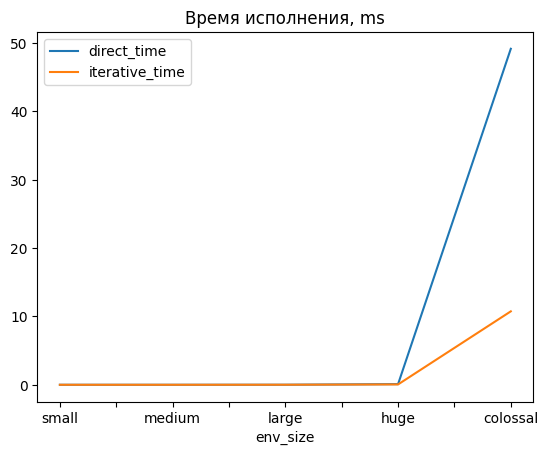

In [23]:
time_result.iloc[:, :-1].plot(title='Время исполнения, ms')

<AxesSubplot:title={'center':'Значение ошибки в зависимости от размера окружения'}, xlabel='env_size'>

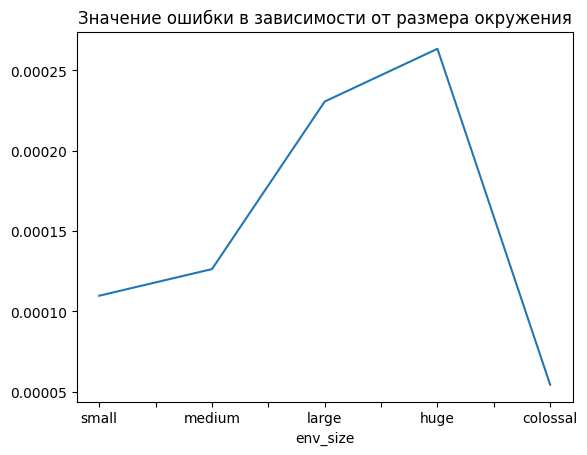

In [24]:
time_result.iloc[:, -1].plot(title='Значение ошибки в зависимости от размера окружения')

In [25]:
env = gym.make('frozen_lake:default-v0', map_name='large', action_set_name='slippery')
env.reset()
policy = np.zeros((env.observation_space.n, env.action_space.n)) + 1/env.action_space.n
evaluator = PolicyEvaluator(env=env)
V_direct = evaluator.direct_evaluation(policy)
t = 1
errors = pd.DataFrame()
for i in range(20):
    t = t/10
    print(t)
    V = evaluator.iterative_evaluation(policy, th=t)
    error = np.abs(V_direct-V).sum()
    errors = errors.append({
        'th': t,
        'error': error
    }, ignore_index=True)

errors.set_index('th', inplace=True)

0.1
0.01
0.001
0.0001
1e-05
1.0000000000000002e-06
1.0000000000000002e-07
1.0000000000000002e-08
1.0000000000000003e-09
1.0000000000000003e-10
1.0000000000000003e-11
1.0000000000000002e-12
1.0000000000000002e-13
1.0000000000000002e-14
1e-15
1.0000000000000001e-16
1e-17
1e-18
1.0000000000000001e-19
1.0000000000000001e-20


<AxesSubplot:title={'center':'Ошибка в зависимости от тетты.'}, xlabel='th'>

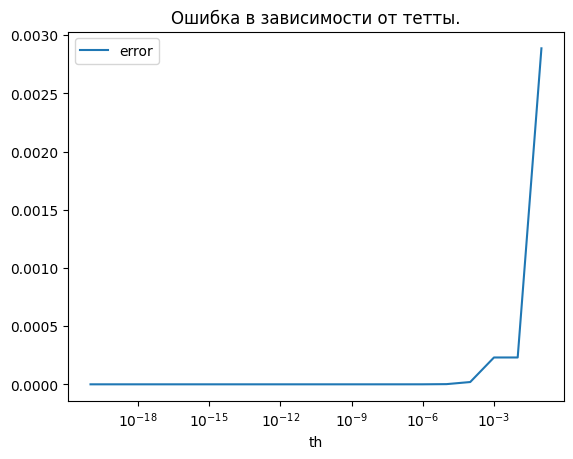

In [22]:
errors.plot(title='Ошибка в зависимости от тетты.', logx=True)